In [1]:
#Stock Analysis Example:
#IVV - iShares Core S&P 500 ETF
#IXUS - iShares Core MSCI Total International Stock ETF
#IUSB - iShares Core Total USD Bond Market ETF
#EEM - iShares MSCI Emerging Market ETF

In [2]:
# Import data libraries 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Import IO libraries
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

C:\Users\Kevin\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
stock_list = ['IVV','IXUS','IUSB','EEM']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [6]:
IVV.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-03,211.699997,211.800003,209.929993,211.039993,5257200,207.491468
2015-08-04,211.000000,211.500000,210.070007,210.600006,3046800,207.058879
2015-08-05,211.740005,212.580002,211.000000,211.399994,2820000,207.845415
2015-08-06,211.520004,211.690002,208.899994,209.690002,2999800,206.164176
2015-08-07,209.429993,209.570007,208.139999,209.179993,3556800,205.662742


In [7]:
IVV.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,204.326087,205.437708,203.014071,204.430909,4.639184e+06,202.876128
std,7.812014,7.497026,8.883912,7.871072,2.324039e+06,8.102674
min,183.179993,184.960007,147.210007,183.830002,1.062400e+06,182.956533
25%,199.350006,200.289993,198.089996,199.380005,3.046800e+06,197.109031
50%,206.250000,207.399994,205.479996,206.490005,4.091200e+06,205.041100
75%,210.000000,210.809998,209.020004,210.009995,5.588300e+06,208.134748
max,218.470001,218.899994,217.649994,218.470001,1.520750e+07,218.470001


In [10]:
IVV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-08-03 to 2016-08-02
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


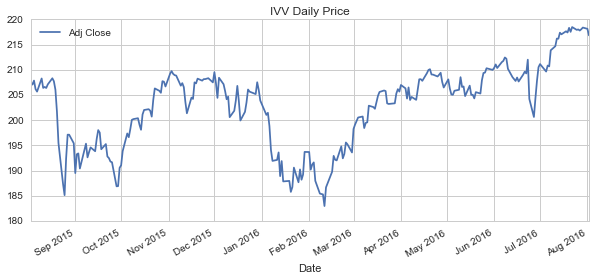

In [15]:
IVV['Adj Close'].plot(legend=True,figsize=(10,4),title='IVV Daily Price')

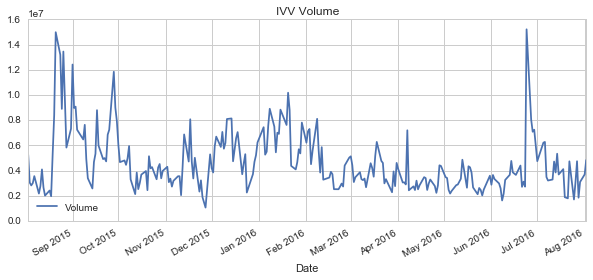

In [16]:
IVV['Volume'].plot(legend=True,figsize=(10,4),title='IVV Volume')

In [17]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    IVV[column_name] = pd.rolling_mean(IVV['Adj Close'],ma)

C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


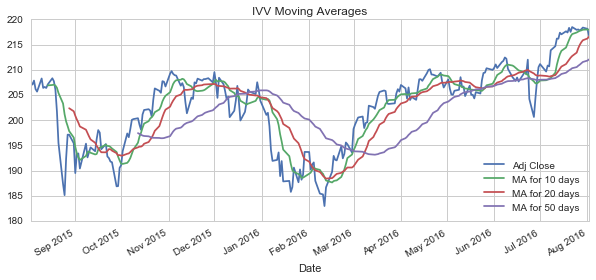

In [19]:
IVV[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4),title='IVV Moving Averages')

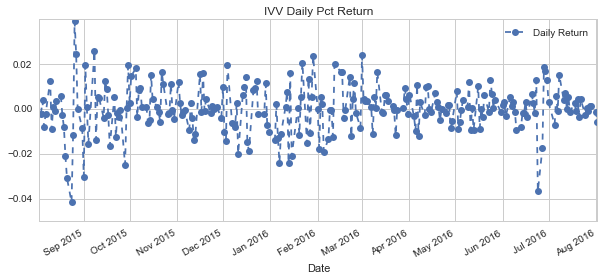

In [21]:
IVV['Daily Return'] = IVV['Adj Close'].pct_change()
IVV['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o',title='IVV Daily Pct Return')

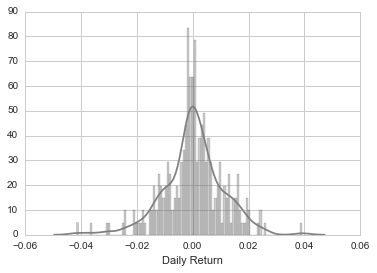

In [25]:
sns.distplot(IVV['Daily Return'].dropna(),bins=100,color='grey')

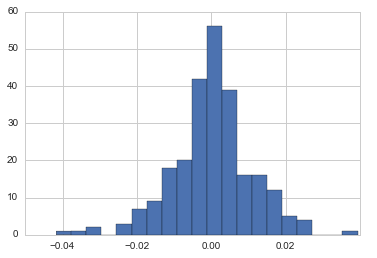

In [26]:
IVV['Daily Return'].hist(bins=20)

In [28]:
closing_df = DataReader(stock_list,'yahoo',start,end)['Adj Close']

In [30]:
closing_df.head()

,EEM,IUSB,IVV,IXUS
Date,,,,
2015-08-03,35.649968,49.536921,207.491468,52.942280
2015-08-04,35.786745,49.443565,207.058879,53.068840
2015-08-05,35.796513,49.325644,207.845415,53.312231
2015-08-06,35.483880,49.389517,206.164176,53.029901
2015-08-07,35.464340,49.212638,205.662742,52.981220


In [31]:
stock_rets = closing_df.pct_change()

In [33]:
stock_rets.head()

,EEM,IUSB,IVV,IXUS
Date,,,,
2015-08-03,NaN,NaN,NaN,NaN
2015-08-04,0.003837,-0.001885,-0.002085,0.002391
2015-08-05,0.000273,-0.002385,0.003799,0.004586
2015-08-06,-0.008734,0.001295,-0.008089,-0.005296
2015-08-07,-0.000551,-0.003581,-0.002432,-0.000918


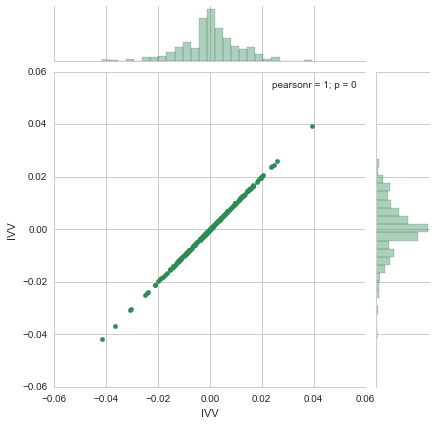

In [34]:
sns.jointplot('IVV','IVV',stock_rets,kind = 'scatter',color='seagreen')

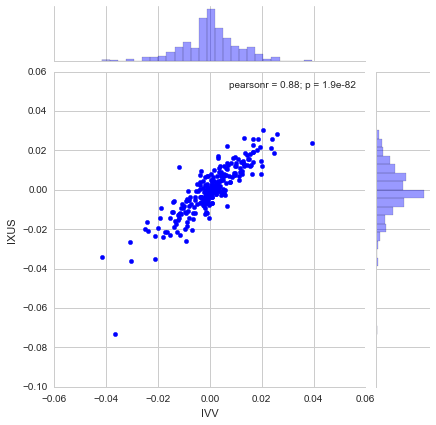

In [35]:
sns.jointplot('IVV','IXUS',stock_rets,kind='scatter',color='blue')

In [36]:
stock_rets.head()

,EEM,IUSB,IVV,IXUS
Date,,,,
2015-08-03,NaN,NaN,NaN,NaN
2015-08-04,0.003837,-0.001885,-0.002085,0.002391
2015-08-05,0.000273,-0.002385,0.003799,0.004586
2015-08-06,-0.008734,0.001295,-0.008089,-0.005296
2015-08-07,-0.000551,-0.003581,-0.002432,-0.000918


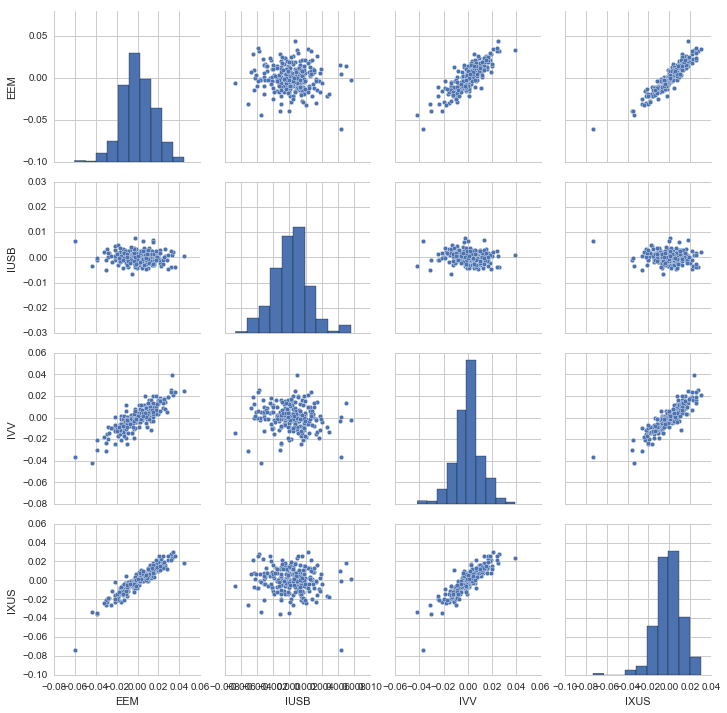

In [37]:
sns.pairplot(stock_rets.dropna())

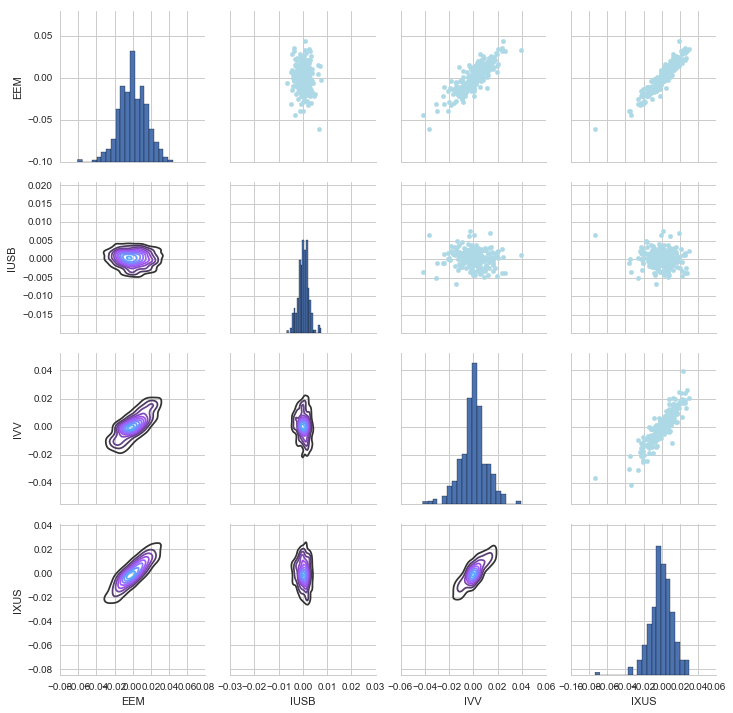

In [41]:
returns_fig = sns.PairGrid(stock_rets.dropna())

returns_fig.map_upper(plt.scatter,color='lightblue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=20)

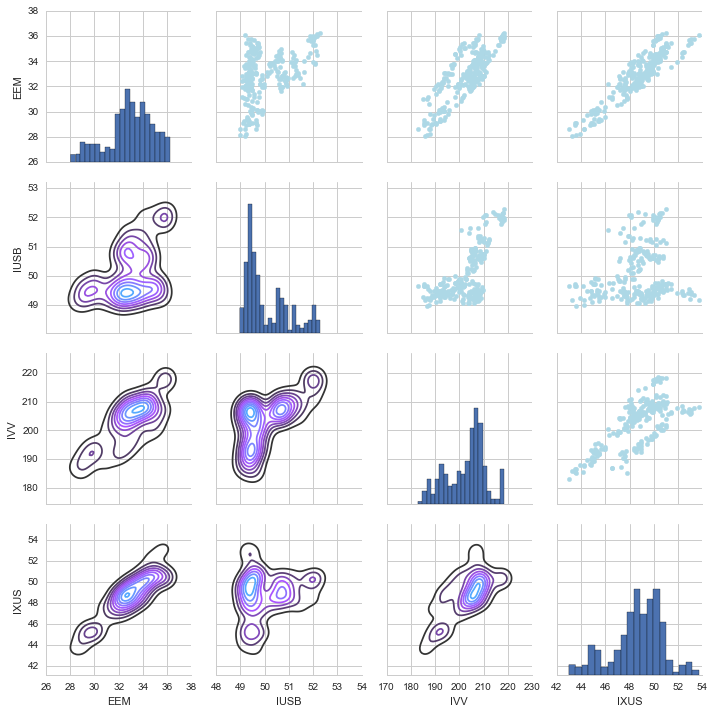

In [42]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='lightblue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=20)

C:\Users\Kevin\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Kevin\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


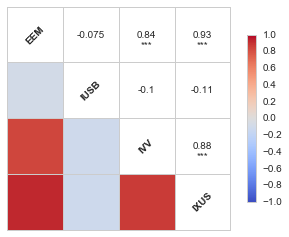

In [43]:
sns.corrplot(stock_rets.dropna(),annot=True)

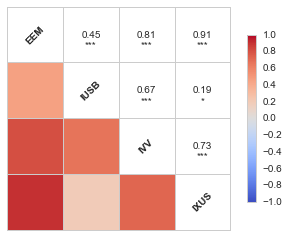

In [44]:
sns.corrplot(closing_df,annot=True)

In [45]:
rets = stock_rets.dropna()

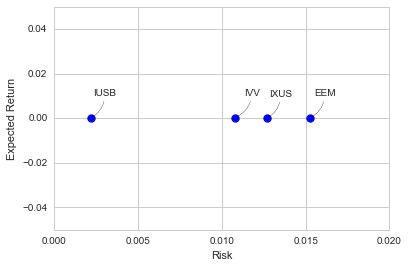

In [56]:
area = np.pi*20
plt.scatter(rets.std(),rets.mean(),s = area)
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.xlim(0,0.02)
plt.ylim(-0.05,0.05)

for label, x, y in zip(rets.columns,rets.std(), rets.mean()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (25,25),
        textcoords = 'offset points', ha = 'right', va = 'center',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

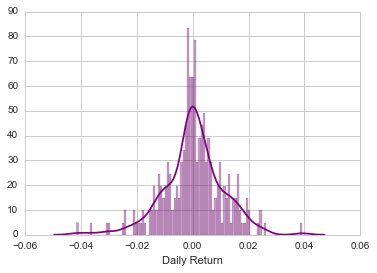

In [58]:
sns.distplot(IVV['Daily Return'].dropna(),bins=100,color='purple')

In [59]:
rets.head()

,EEM,IUSB,IVV,IXUS
Date,,,,
2015-08-04,0.003837,-0.001885,-0.002085,0.002391
2015-08-05,0.000273,-0.002385,0.003799,0.004586
2015-08-06,-0.008734,0.001295,-0.008089,-0.005296
2015-08-07,-0.000551,-0.003581,-0.002432,-0.000918
2015-08-10,0.016804,-0.000699,0.012669,0.013414


In [60]:
rets['IVV'].quantile(0.05)

-0.017758709913407701

In [61]:
days = 365

dt = 1/days

mu = rets.mean()['IVV']

sigma = rets.std()['IVV']

In [65]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [66]:
IVV.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-08-03,211.699997,211.800003,209.929993,211.039993,5257200,207.491468,NaN,NaN,NaN,NaN
2015-08-04,211.000000,211.500000,210.070007,210.600006,3046800,207.058879,NaN,NaN,NaN,-0.002085
2015-08-05,211.740005,212.580002,211.000000,211.399994,2820000,207.845415,NaN,NaN,NaN,0.003799
2015-08-06,211.520004,211.690002,208.899994,209.690002,2999800,206.164176,NaN,NaN,NaN,-0.008089
2015-08-07,209.429993,209.570007,208.139999,209.179993,3556800,205.662742,NaN,NaN,NaN,-0.002432


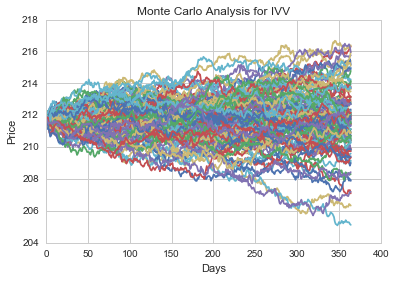

In [68]:
start_price = 211.70

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for IVV')

In [70]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

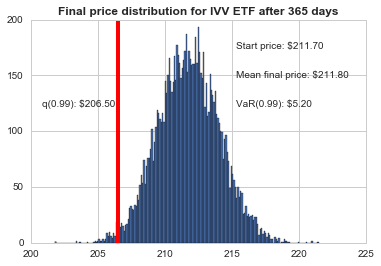

In [71]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7, s="Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6, s="VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15,0.6, s="q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for IVV ETF after %s days" % days, weight='bold');
